In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow import keras

In [13]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)


170500096/170498071 [==============================] - 465s 3us/step
x_train: (50000, 32, 32, 3)


In [15]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')



In [16]:
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
iterations =300
lr =1.5e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)


w1: (3072, 10)
b1: (10,)


In [25]:
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]

    y_p=x.dot(w1)+b1
    loss=(1./batch_size)*np.square(y_p-y).sum()+reg*(np.sum(w1*w1))
    loss_history.append(loss)
    if t%5==0:
        print('iteration %d : loss %f' % (t,loss))

    dy_y_p=(1./batch_size)*2.0*(y_p-y)
    dy_w1=x.T.dot(dy_y_p)+reg*w1
    dy_b1=dy_y_p.sum(axis=0)

    w1 -=lr*dy_w1
    b1 -=lr*dy_b1
    lr *=lr_decay



iteration 0 : loss 1.000006
iteration 5 : loss 0.903812
iteration 10 : loss 0.873287
iteration 15 : loss 0.853347
iteration 20 : loss 0.839073
iteration 25 : loss 0.828538
iteration 30 : loss 0.820631
iteration 35 : loss 0.814618
iteration 40 : loss 0.809989
iteration 45 : loss 0.806380
iteration 50 : loss 0.803529
iteration 55 : loss 0.801246
iteration 60 : loss 0.799390
iteration 65 : loss 0.797859
iteration 70 : loss 0.796577
iteration 75 : loss 0.795487
iteration 80 : loss 0.794548
iteration 85 : loss 0.793727
iteration 90 : loss 0.793000
iteration 95 : loss 0.792350
iteration 100 : loss 0.791762
iteration 105 : loss 0.791225
iteration 110 : loss 0.790731
iteration 115 : loss 0.790274
iteration 120 : loss 0.789847
iteration 125 : loss 0.789448
iteration 130 : loss 0.789073
iteration 135 : loss 0.788718
iteration 140 : loss 0.788383
iteration 145 : loss 0.788064
iteration 150 : loss 0.787760
iteration 155 : loss 0.787470
iteration 160 : loss 0.787193
iteration 165 : loss 0.786927
it

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

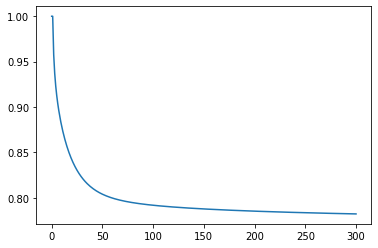

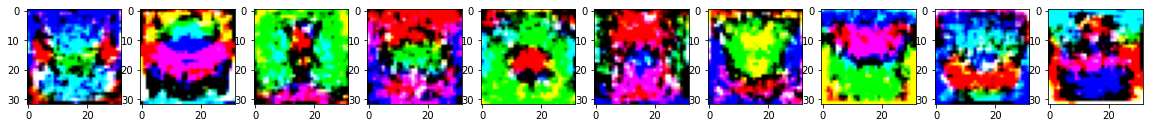

Training Loss : 0.7823157990284689
Training Accuracy : 0.21768420097153107
Testing Loss : 0.787319557329157
Testing Accuracy : 0.21268044267084296


In [30]:
plt.plot(loss_history)
 
f,ax=plt.subplots(1,10)
f.set_size_inches(20,6)

for i in range(10):
    img=w1[:,i].reshape(32,32,3)
    ax[i].imshow(img*1000)
plt.show()

x_t=x_train
y_p=x_t.dot(w1)+b1

train_loss=(1/Ntr)*(np.square(y_train-y_p)).sum()
train_accuracy=1-train_loss
print('Training Loss :',train_loss)
print('Training Accuracy :',train_accuracy)

x_t=x_test
y_p=x_t.dot(w1)+b1

test_loss=(1/Nte)*(np.square(y_test-y_p)).sum()
test_accuracy=1-test_loss
print('Testing Loss :',test_loss)
print('Testing Accuracy :',test_accuracy)





